In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
resume = pd.read_csv('/content/drive/MyDrive/UpdatedResumeDataSet.csv')

In [ ]:
resume.head()

,Category,Resume
0,6,Skills Programming Languages Python pandas num...
1,6,Education Details May 2013 to May 2017 B E UIT...
2,6,Areas of Interest Deep Learning Control System...
3,6,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,Education Details MCA YMCAUST Faridabad Haryan...


In [ ]:
resume['Category'].value_counts()

Category
15    84
23    70
8     55
20    48
24    45
12    44
13    42
3     40
10    40
18    40
6     40
22    40
16    40
1     36
7     33
11    30
14    30
19    30
4     28
9     28
2     26
17    25
21    24
5     24
0     20
Name: count, dtype: int64

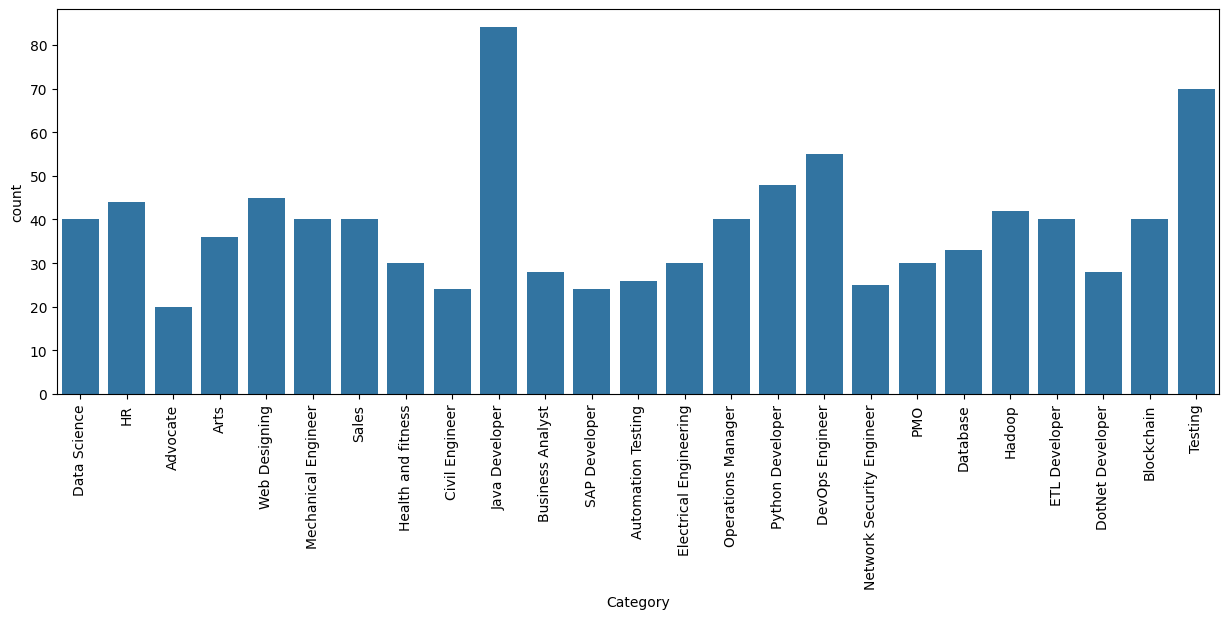

In [ ]:
#Visualising the data
plt.figure(figsize=(15,5))
sns.countplot(x=resume['Category'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
resume['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

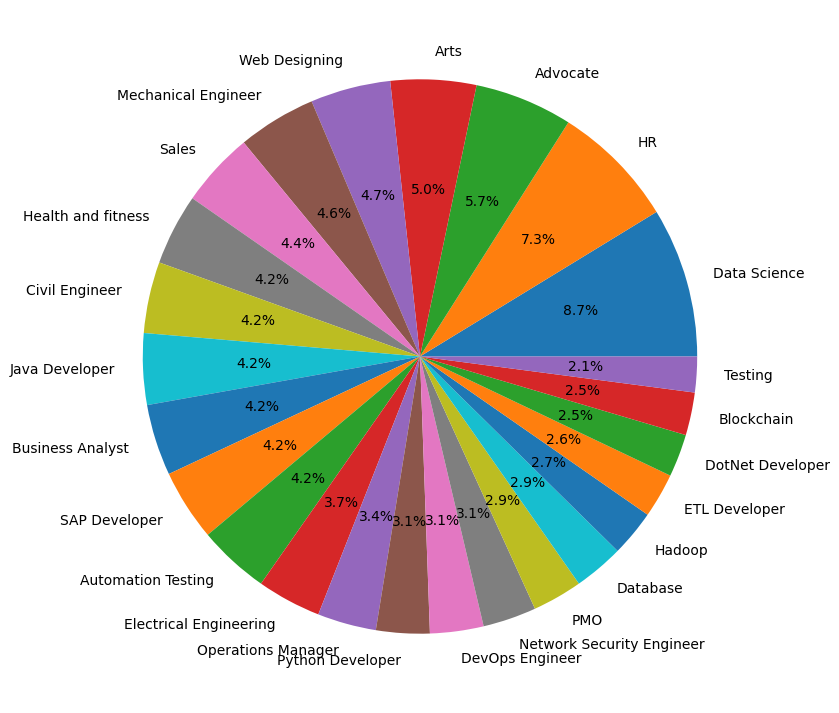

In [ ]:
counts = resume['Category'].value_counts() # value of element
vars = resume['Category'].unique()         # name of category element
plt.figure(figsize=(10,9))
plt.pie(counts, labels=vars, autopct='%1.1f%%')
plt.show()

Cleaning data

In [ ]:
resume['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [ ]:
# Going to remove unncessary urls,hashtags, mentions, special letters, punctuation in the text
import re
def clean_resume(text):
  clean_text = re.sub('http\S+\s',' ',text)
  clean_text = re.sub('@\S+\s',' ',text)
  clean_text = re.sub('#\S+\s',' ',text)
  clean_text = re.sub('RT|cc',' ',text)
  clean_text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', clean_text)
  clean_text = re.sub(r'[^\x00-\x7f]', ' ', clean_text)
  clean_text = re.sub('\s+', ' ', clean_text)

  return clean_text

# test text
text = "hey our website is https/www.google.com you are welcome ## ok $$ hi @ or and : we are captivated &&"
clean_resume(text)


'hey our website is https www google com you are welcome ok hi or and we are captivated '

In [ ]:
resume["Resume"] = resume["Resume"].apply(lambda x: clean_resume(x))

In [ ]:
resume['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

Convering categorical values into numerical values

In [ ]:
from sklearn.preprocessing import LabelEncoder
label =LabelEncoder()
label.fit(resume['Category'])
# now transforming the data
resume['Category'] = label.transform(resume['Category'])


In [ ]:
resume.Category.unique() # represents value of unique data elements--> data science :  6
#         'Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
#        'Mechanical Engineer', 'Sales', 'Health and fitness',
#        'Civil Engineer', 'Java Developer', 'Business Analyst',
#        'SAP Developer', 'Automation Testing', 'Electrical Engineering',
#        'Operations Manager', 'Python Developer', 'DevOps Engineer',
#        'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
#        'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [ ]:
resume

,Category,Resume
0,6,Skills Programming Languages Python pandas num...
1,6,Education Details May 2013 to May 2017 B E UIT...
2,6,Areas of Interest Deep Learning Control System...
3,6,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,Education Details MCA YMCAUST Faridabad Haryan...
...,...,...
957,23,Computer Skills Proficient in MS office Word B...
958,23,Willingness to a ept the challenges Positive ...
959,23,PERSONAL SKILLS Quick learner Eagerness to lea...
960,23,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


Vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer(stop_words='english')
tfid.fit(resume['Resume'])
text = tfid.transform(resume['Resume'])

In [ ]:
from google.colab import files
files.download('tfid.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
resume['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

In [ ]:
text[0]

<1x7355 sparse matrix of type '<class 'numpy.float64'>'
	with 315 stored elements in Compressed Sparse Row format>

Splitting the data into train test

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(text,resume['Category'],test_size=0.2, random_state=42)


80 % of the data is trained

In [ ]:
Xtrain.shape

(769, 7355)

20 % of the data is tested

In [ ]:
Xtest.shape

(193, 7355)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

model = KNeighborsClassifier(n_neighbors=4)

In [ ]:
model.fit(Xtrain , ytrain)
pred = model.predict(Xtest)
print(accuracy_score(ytest,pred))

0.9844559585492227


As of know we have predicted the model accuracy lets test it further

In [ ]:
import pickle
pickle.dump(tfid,open('tfid.pkl','wb'))
pickle.dump(model, open('model.pkl','wb'))

In [ ]:
with open('model.pkl', 'rb') as f:
  model = pickle.load(f)
  print(model)

KNeighborsClassifier(n_neighbors=4)


In [ ]:
myresume="""I am a data scientist specializing in machine
learning, deep learning, and computer vision. With
a strong background in mathematics, statistics,
and programming, I am passionate about
uncovering hidden patterns and insights in data.
I have extensive experience in developing
predictive models, implementing deep learning
algorithms, and designing computer vision
systems. My technical skills include proficiency in
Python, Sklearn, TensorFlow, and PyTorch.
What sets me apart is my ability to effectively
communicate complex concepts to diverse
audiences. I excel in translating technical insights
into actionable recommendations that drive
informed decision-making.
If you're looking for a dedicated and versatile data
scientist to collaborate on impactful projects, I am
eager to contribute my expertise. Let's harness the
power of data together to unlock new possibilities
and shape a better future.
Contact & Sources
Email: kamakshi.madaan1321@gmail.com
Phone: 9588746221
Github: https://github.com/Kamakshiii13
ABOUT ME
WORK EXPERIENCE
Kamakshi Madaan
LANGUAGES
English
Hindi
I am a versatile data scientist with expertise in a wide
range of projects, including machine learning,
recommendation systems, deep learning, and computer
vision. Throughout my career, I have successfully
developed and deployed various machine learning models
to solve complex problems and drive data-driven
decision-making
Machine Learnine
Deep Learning
Computer Vision
Recommendation Systems
Data Visualization
Programming Languages (Python, SQL)
Data Preprocessing and Feature Engineering
Model Evaluation and Deployment
Statistical Analysis
Communication and Collaboration"""

In [ ]:
import pickle
# load model.pkl trained classifier
model = pickle.load(open('model.pkl', 'rb'))
# import resume
cleaned_resume = clean_resume(myresume)
# now vectorizing the resume
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = pickle.load(open('tfid.pkl', 'rb'))
input_features = tfid.transform([cleaned_resume])
# after assigning vectors to each word now we will assign prediction id
predicted_id = model.predict(input_features)

# assigning predicyed id to name of category:
category_mapping={
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate",
}
predicted_category = category_mapping.get(predicted_id[0], "Unknown")
print("Predicted category:",predicted_category,predicted_id)




Predicted category: Data Science [6]
